#### Name : Aakanksha Patil

# TASK 3

### Prediction Using Decision Tree Algorithm (Level - Intermediate)

### For the given ‘Iris’ dataset, create the Decision Tree classifier with a purpose that if a new data is fed, it would predict the right class acoordingly. Also, visualize the Decision Tree graphically.

#### Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading of the dataset

In [2]:
from sklearn import datasets

In [3]:
iris=datasets.load_iris()
X=pd.DataFrame(iris.data,columns=iris.feature_names)

In [7]:
y=iris.target
y=pd.DataFrame(y)
print(y)

     0
0    0
1    0
2    0
3    0
4    0
..  ..
145  2
146  2
147  2
148  2
149  2

[150 rows x 1 columns]


In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df=pd.concat([X,y],axis=1)

In [13]:
df.rename(columns={0:'Target'},inplace=True)

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### EDA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


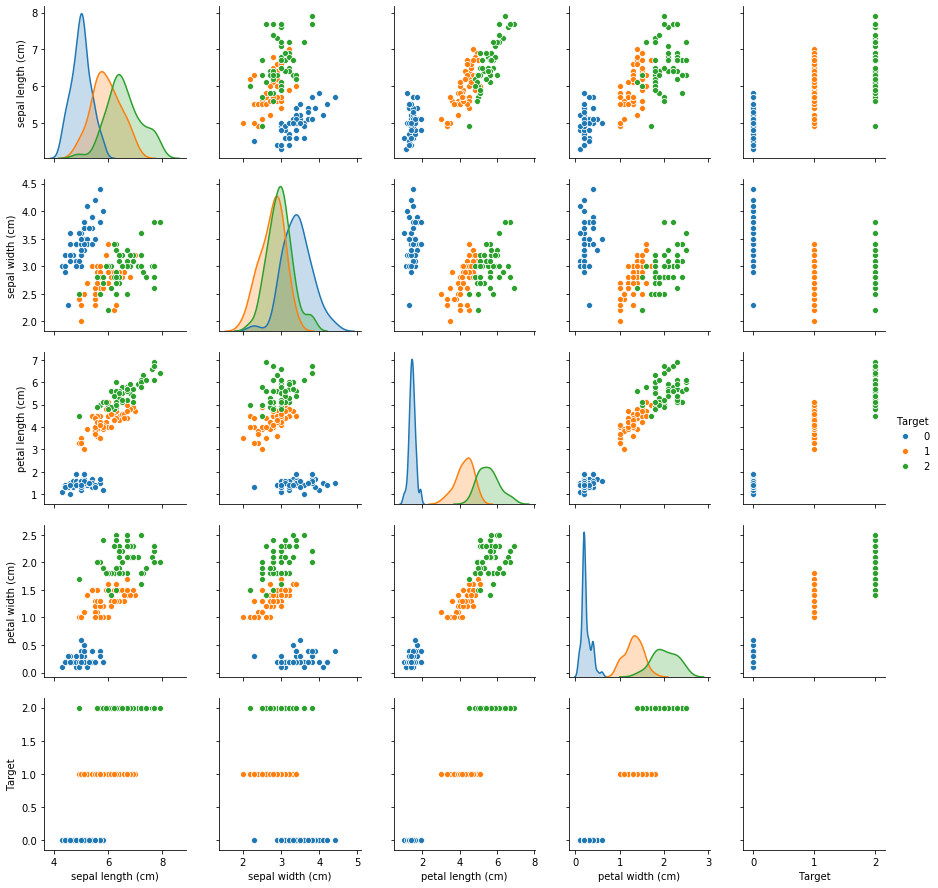

In [15]:
sns.pairplot(df,hue='Target')
plt.show()

#### Data preparation

#### Splitting the data in train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Standard Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [19]:
X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

#### Fitting a Decision tree on train data an predicting on Test data

In [20]:
from sklearn.tree import DecisionTreeClassifier


In [21]:
dtc=DecisionTreeClassifier(random_state=0)

In [22]:
dtc.fit(X_trains,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
y_pred = dtc.predict(X_tests)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [31]:
print(confusion_matrix(y_test,y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [32]:
print(accuracy_score(y_test,y_pred))

0.9777777777777777


#### Visualizing the Decision Tree

In [33]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [34]:
dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [36]:
# Import necessary libraries for graph viz
import sklearn
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [37]:
import os

os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [38]:
dtc.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

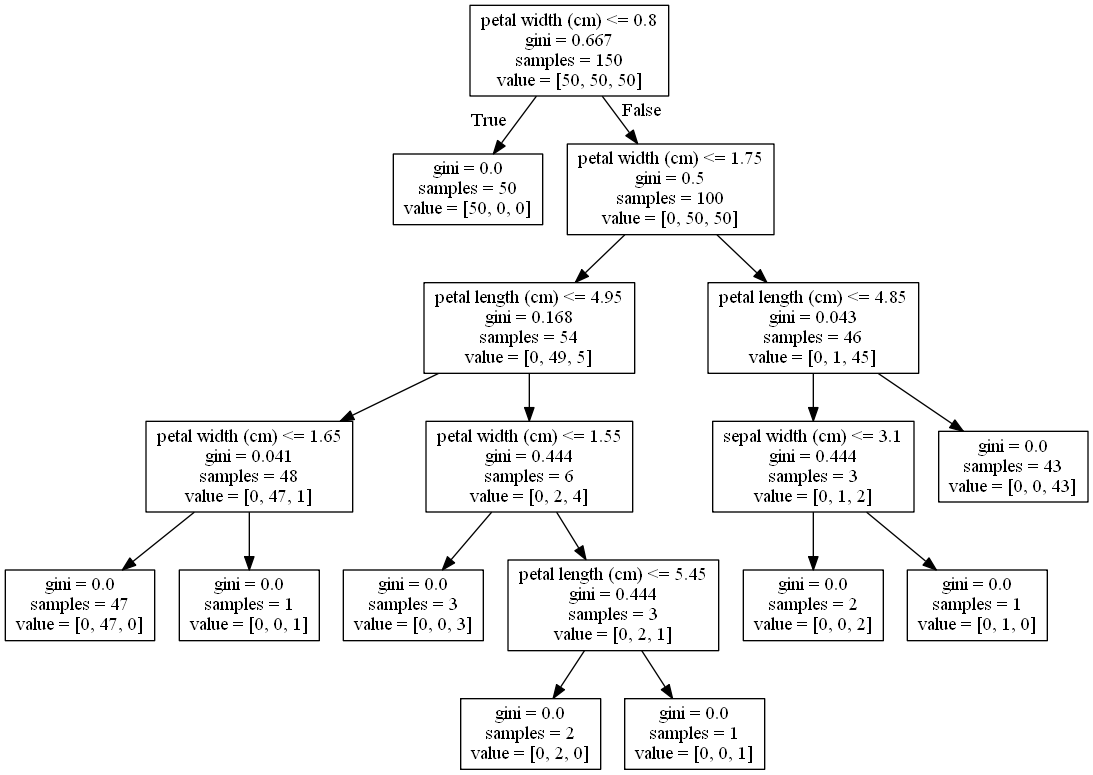

In [39]:
features = X.columns
# Create DOT data
dot_data = export_graphviz(dtc, out_file=None, feature_names=features)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
# Show graph
Image(graph.create_png())